### 계층적 군집분석

> USArrests 데이터의 정보로 거리를 구하고, 최단, 최장, 와드 연결법 사용해보기

* Murder : 살인 체포(100,000명당)
* Assault : 폭행 체포(100,000명당)
* UrbanPop : 도시 인구 비율
* Rape : 강간 체포(100,000명당)

#### 1. 최단 연결법

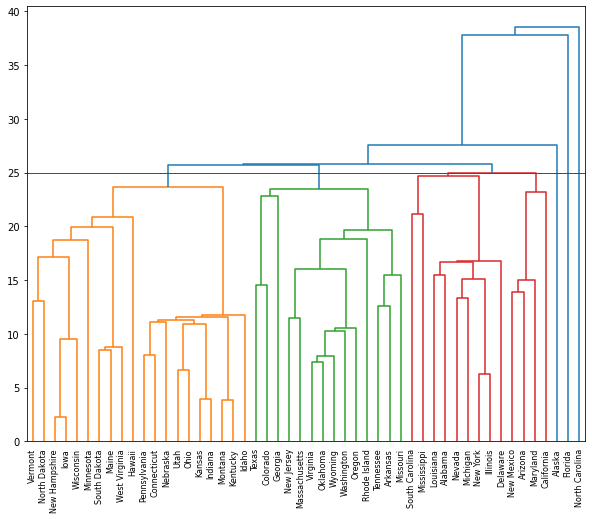

In [51]:
import pandas as pd
import numpy as np
from scipy.cluster.hierarchy import dendrogram, linkage, fcluster
import matplotlib.pyplot as plt

df = pd.read_csv('./data/USArrests.csv')
df.columns = ['State', 'Murder', 'Assault', 'UrbanPop', 'Rape']
labelList = df.State.to_list()

# 최단 연결법
single = linkage(df.iloc[:, 1::], metric='euclidean', method = 'single')

# 덴드로그램 그리기
plt.figure(figsize=(10, 8))
dendrogram(single,
           orientation='top',
           labels = labelList,
           distance_sort='descending',
           color_threshold = 25, # 군집의 수를 설정하는 Height 값 설정
           show_leaf_counts=True )

plt.axhline(y=25, color='r', linewidth = 1) # Height 값에 따라 선을 그어 적절한 군집 수 설정
plt.show()

#### 2. 와드 연결법

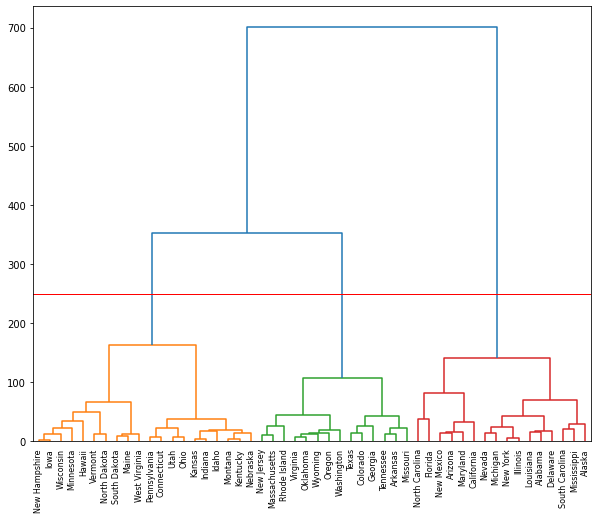

In [52]:
ward = linkage(df.iloc[:, 1::], metric='euclidean', method = 'ward')

# 덴드로그램 그리기
plt.figure(figsize=(10, 8))
dendrogram(ward,
           orientation='top',
           labels = labelList,
           distance_sort='descending',
           color_threshold = 250, # 군집의 수를 설정하는 Height 값 설정
           show_leaf_counts=True )

plt.axhline(y=250, color='r', linewidth = 1) # Height 값에 따라 선을 그어 적절한 군집 수 설정
plt.show()

#### 결과 해석
* 최단 연결법은 군집마다 가지고 있는 객체의 수가 비슷하지 않아 군집을 해석하기에 어려울 수 있다.
* 이러한 문제점을 보완하기 위해, 주로 와드 연결법을 사용한다.

In [63]:
# fcluster 함수를 통해 t값을 적용시켜 각 객체들이 가진 군집번호 데이터화 시키기

# state마다 어떤 군집에 설정되었는지 확인
assignments = fcluster(ward, 250, 'distance')

df['cluster'] = assignments
df.groupby('cluster').describe()

Murder                                                       Assault   
         count       mean       std  min     25%    50%    75%   max   count   
cluster                                                                        
1         16.0  11.812500  2.795920  5.9  10.300  11.75  13.50  16.1    16.0  \
2         14.0   8.214286  3.944199  3.4   5.325   7.65   8.95  17.4    14.0   
3         20.0   4.270000  2.303795  0.8   2.500   3.55   6.00   9.7    20.0   

                     ... UrbanPop        Rape                              
               mean  ...      75%   max count       mean       std   min   
cluster              ...                                                   
1        272.562500  ...    80.25  91.0  16.0  28.375000  9.602882  15.8  \
2        173.285714  ...    79.50  89.0  14.0  22.842857  7.402361   8.3   
3         87.550000  ...    67.50  83.0  20.0  14.390000  4.669148   7.3   

                                      
            25%    50%     75%   max  
cluster                               
1        21.950  26.95  32.850  46.0  
2        18.975  23.10  26.725  38.7  
3        11.025  14.55  16.875  22.9  

[3 rows x 32 columns]

---

### 비계층적 군집분석